In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
#import for stock data visaulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import for reading from yahoo fin
from pandas_datareader import data
from datetime import datetime

In [6]:
#define stocks to be used for data analysis
stock_list = ['AAPL', 'AMZN', 'MSFT', 'GOOG']
#start and end date for fetching data
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
for stock_symbol in stock_list:
    globals() [stock_symbol] = data.DataReader(stock_symbol, 'yahoo', start , end)

In [7]:
stock_list = ['AAPL', 'AMZN', 'MSFT', 'GOOG']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
stocksData = []
for stock_symbol in stock_list:
    stockData = data.DataReader(stock_symbol, 'yahoo', start , end)
    stocksData.append(stockData)

In [6]:
stocksData[0].describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,191.792789,188.070199,189.923785,190.026614,3.221903e+07,188.745400
std,21.766925,21.483611,21.606058,21.606972,1.420980e+07,21.292771
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,174.974998,172.225006,173.790001,174.235001,2.263160e+07,173.495911
50%,190.080002,187.449997,188.949997,188.589996,2.840280e+07,187.189621
75%,209.375000,205.784996,207.320000,207.760002,3.856335e+07,205.900421
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [8]:
#view summary stocks of Apple
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,194.896056,190.830757,192.804263,192.880877,3.289025e+07,191.076734
std,21.923919,21.662715,21.752191,21.735604,1.385691e+07,21.344728
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.934998,173.555000,174.805000,174.794998,2.329740e+07,173.366135
50%,198.850006,193.820007,196.419998,197.000000,2.985580e+07,195.501465
75%,210.139999,206.900002,208.610001,208.724998,3.927970e+07,207.600060
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,228.523819


In [9]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,1141.952477,1119.348259,1130.830499,1130.939718,1.613787e+06,1130.939718
std,60.987579,65.451724,63.222899,64.041995,7.325850e+05,64.041995
min,1003.539978,970.109985,973.900024,976.219971,6.915000e+05,976.219971
25%,1092.674988,1067.905029,1079.734985,1079.559998,1.203800e+06,1079.559998
50%,1141.699951,1118.500000,1130.079956,1132.030029,1.436700e+06,1132.030029
75%,1190.219971,1168.164978,1181.649963,1182.375000,1.837800e+06,1182.375000
max,1289.270020,1266.295044,1274.000000,1287.579956,6.207000e+06,1287.579956


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-17 to 2019-08-16
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


In [11]:
import pandas as pd
#create a pandas DataFrame for AAPL stock
AAPL_ds = pd.DataFrame(AAPL['Adj Close'])

In [12]:
AAPL_ds.shape

(251, 1)

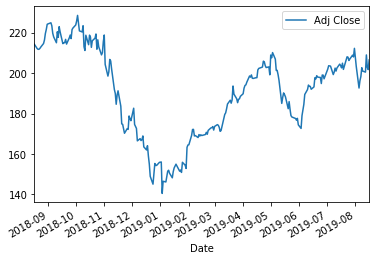

In [16]:
AAPL_ds.plot()

In [18]:
GOOG_ds = pd.DataFrame(GOOG['Adj Close'])

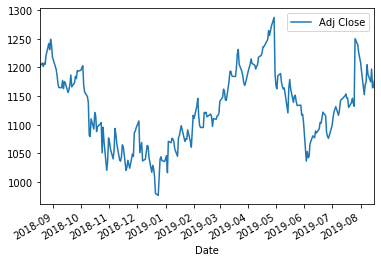

In [19]:
GOOG_ds.plot()

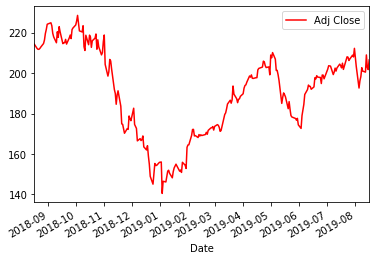

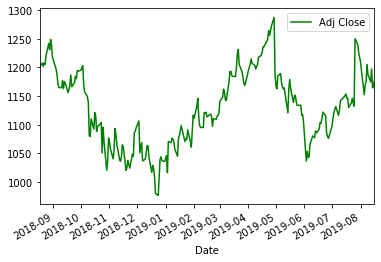

In [20]:
AAPL_ds.plot(color ='r')
GOOG_ds.plot(color ='g')

In [25]:
aapl_arr = AAPL_ds.iloc[:,0].values

In [26]:
aapl_arr.shape

(251,)

In [27]:
aapl_arr[0]

214.25523376464844

In [28]:
import numpy as np
def next_batch(batch_size,num_steps):
    x_batch = np.zeros((batch_size,num_steps))
    y_batch = np.zeros((batch_size,num_steps))
    
    for i in range(batch_size):
        stindex = np.random.randint(0,250-num_steps-1)
        #print(stindex)
        endindex = stindex + num_steps
        x_batch[i] = aapl_arr[stindex: stindex + num_steps]
        y_batch[i] = aapl_arr[stindex+1: stindex+num_steps+1]
    return x_batch, y_batch


In [34]:
x_batch, y_batch  = next_batch(10,20)

In [35]:
x_batch.shape, y_batch.shape

((10, 20), (10, 20))

In [36]:
x_batch[9]

array([170.72140503, 169.75878906, 171.6542511 , 172.90467834,
       173.00392151, 173.53979492, 171.83288574, 173.63903809,
       174.51235962, 174.19477844, 173.19247437, 171.18783569,
       171.5947113 , 177.53913879, 179.53387451, 180.32777405,
       182.33239746, 184.70422363, 186.58978271, 185.1111145 ])

In [37]:
y_batch[1]

array([216.66781616, 214.33403015, 217.41618347, 218.7947998 ,
       217.05184937, 221.51260376, 222.2905426 , 223.787323  ,
       225.77645874, 228.52381897, 224.50617981, 220.86271667,
       220.35066223, 223.40327454, 213.05389404, 211.17306519,
       218.71603394, 214.03860474, 218.75541687, 217.81008911])

In [23]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [38]:
import tensorflow as tf
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 150
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [39]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

W0818 22:32:31.673339 4573185472 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0818 22:32:31.674021 4573185472 deprecation.py:323] From <ipython-input-39-81e769b94db4>:2: BasicRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [40]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

W0818 22:32:47.665714 4573185472 deprecation.py:323] From <ipython-input-40-f7b88a02a855>:1: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0818 22:32:47.839908 4573185472 deprecation.py:506] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0818 22:32:47.848181 4573185472 deprecation.py:506] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/rnn_cell_impl.py:459: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for up

In [41]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [42]:
saver = tf.train.Saver()
n_iterations = 1000
batch_size = 15

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        X_batch = X_batch.reshape(batch_size,n_steps,1)
        y_batch = y_batch.reshape(batch_size,n_steps,1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_stock_series_model") # not shown in the content

0 	MSE: 28706.703
100 	MSE: 464.66125
200 	MSE: 68.34431
300 	MSE: 17.335705
400 	MSE: 17.156122
500 	MSE: 15.611621
600 	MSE: 16.418903
700 	MSE: 15.574866
800 	MSE: 16.098524
900 	MSE: 15.134296


In [43]:
aapl_arr.shape

(251,)

In [45]:
aapl_arr[229:249]

array([203.6362915 , 203.45697021, 199.26290894, 200.478302  ,
       202.46075439, 200.98635864, 202.53050232, 204.43327332,
       203.72595215, 202.58030701, 204.88156128, 201.82318115,
       206.43565369, 208.04951477, 207.88017273, 206.23641968,
       206.95368958, 208.88633728, 207.98974609, 212.23362732,
       207.6410675 , 203.24777222, 192.60818481, 196.2543335 ,
       198.28660583, 202.6599884 , 200.99000549, 200.47999573,
       208.97000122, 202.75      ])

In [52]:
with tf.Session() as sess:                          # not shown in the content
    saver.restore(sess, "./my_stock_series_model")   # not shown

    X_new = aapl_arr[229:249]
    X_new = X_new.reshape(1,20,1)
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    y_true= aapl_arr[230:250]
    print(y_pred)

[[[204.9299 ]
  [202.1664 ]
  [204.99129]
  [207.85011]
  [207.6442 ]
  [206.30411]
  [206.48978]
  [208.31699]
  [207.55019]
  [211.12459]
  [207.58913]
  [203.43776]
  [194.83524]
  [196.33752]
  [198.11996]
  [201.20786]
  [200.27559]
  [199.62766]
  [207.01845]
  [202.60558]]]


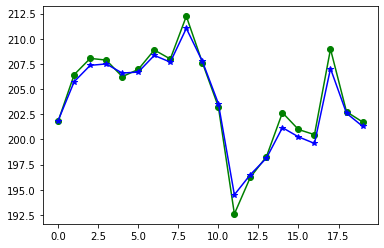

In [51]:
plt.plot(y_true, marker="o", color="green")
plt.plot(y_pred.ravel(), marker="*", color="blue")

In [11]:
#View First 5 records
AAPL_ds.head()

,Adj Close
Date,
2018-01-16,173.583969
2018-01-17,176.450928
2018-01-18,176.608551
2018-01-19,175.820389
2018-01-22,174.381973


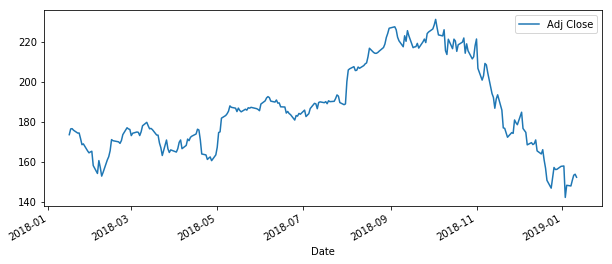

In [12]:
AAPL_ds.plot(legend=True, figsize=(10,4))

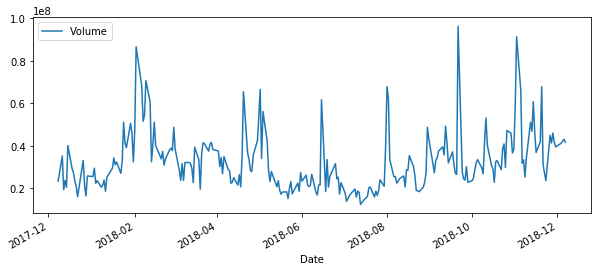

In [44]:
#view volume of stock traded every day
AAPL['Volume'].plot(legend=True, figsize=(10,4))

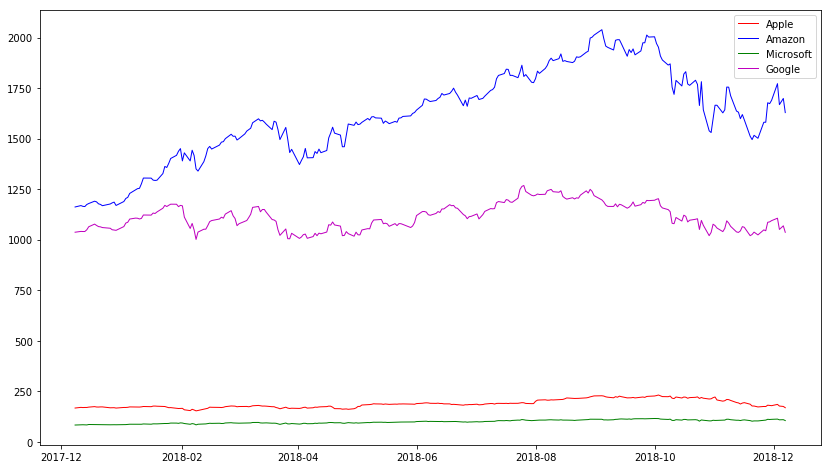

In [45]:
#plot all stock performances  on Adj close for entire year
plt.figure(figsize=(14,8))
plt.plot(AAPL['Adj Close'], 'r', label='Apple', linewidth=1)
plt.plot(AMZN['Adj Close'], 'b', label='Amazon', linewidth=1)
plt.plot(MSFT['Adj Close'], 'g', label='Microsoft', linewidth=1)
plt.plot(GOOG['Adj Close'], 'm', label='Google', linewidth=1)
plt.legend()
plt.show()

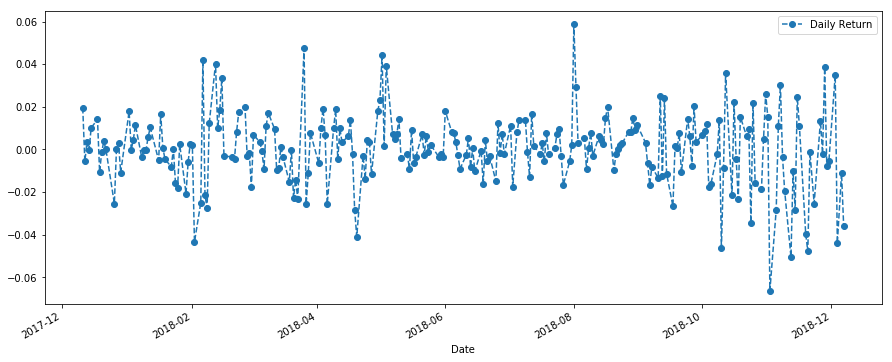

In [17]:
#computing pc chnage
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,6), legend=True, linestyle='--', marker='o')

In [24]:
#Fetch closing prices
closing_price_stock = data.DataReader(['AAPL', 'AMZN', 'MSFT', 'GOOG'], 'yahoo', start , end)['Adj Close']

In [25]:
closing_price_stock.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-14,169.672668,1174.260010,1049.150024,83.248863
2017-12-15,171.396790,1179.140015,1064.189941,85.372101
2017-12-18,173.810547,1190.579956,1077.140015,84.910088
2017-12-19,171.958359,1187.380005,1070.680054,84.369461
2017-12-20,171.771179,1177.619995,1064.949951,84.064720


In [27]:
stock_returns = closing_price_stock.pct_change()

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


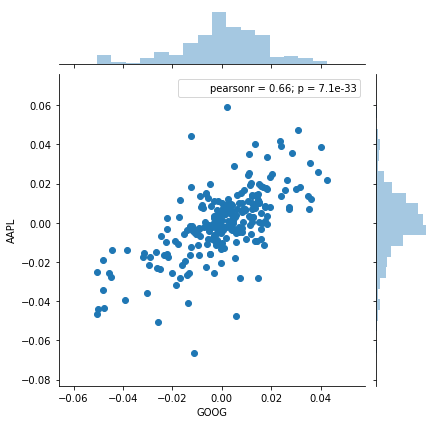

In [28]:
#compare daily returns of Google and Apple
sns.jointplot('GOOG', 'AAPL', stock_returns,kind='scatter')

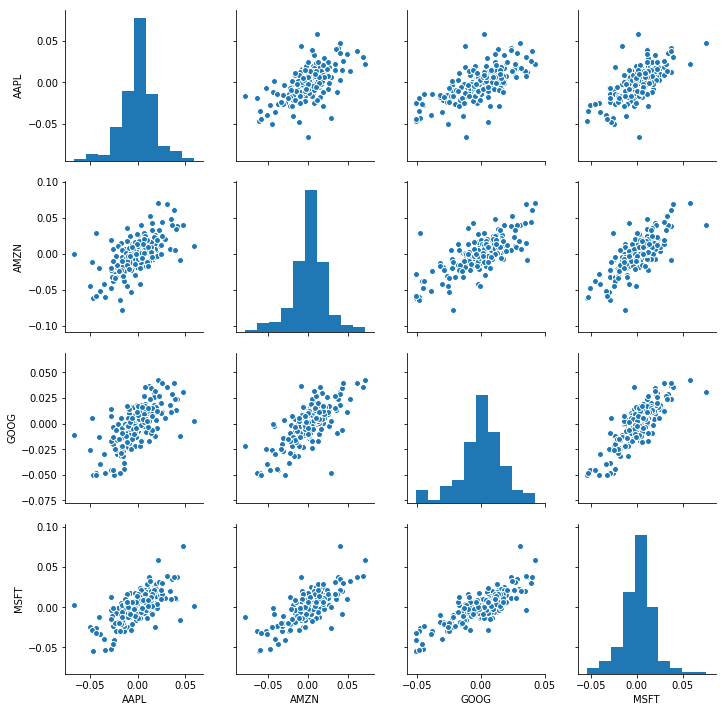

In [29]:
sns.pairplot(stock_returns.dropna())